# Aarki Case Study Data Analysis of Lead Quality Improvment Possibility

## Q1 
#  Are we seeing any lead quality trends over time (improving, declining)? Are they statisticall significantt?

In [946]:
import pandas as pd

# Step 1: Load data
#df = pd.read_csv(r'D:\Information Technology\Aarki data analysis project for assesment\Analyst case study dataset 1.csv')

df = pd.read_csv(r'D:\Information Technology\Aarki data analysis project for assesment\Analyst case study dataset 1.csv', parse_dates=['LeadCreated'])
# making it to the pandas dataframe
df.head() # printing the preview of the data

,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,Partner,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters
0,01-07-2009,Dorinda,kanani@sandwichisles.net,FDF81FDA-A649-437B-B99C-FDDE74F7971B,NaN,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,5.0,...,google,www.google.com,Debt Holding Tank,Holding Tank - Debt,Debt specialists,debt specialists,http://www.google.com/search,sourceid=navclient&aq=1&oq=debt sp&ie=UTF-8&rl...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...
1,13-04-2009,Presetta,clerk2@ustconline.net,4190ACB7-5026-416C-B987-ED8AD427D5E6,NaN,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,AdKnowledge,NaN,Financial Services,Consolidate,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
2,21-04-2009,Gina,wagoner_gina@yahoo.com,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,AdKnowledge,us.mc582.mail.yahoo.com,Financial Services,Consolidate,NaN,NaN,http://us.mc582.mail.yahoo.com/mc/showMessage,&fid=Inbox&sort=date&order=down&startMid=0&.ra...,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
3,03-08-2009,Kari,usa4ley@yahoo.com,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,...,Google,norwich.kijiji.com,DebtReductionInc,Lower Payments,NaN,NaN,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
4,13-04-2009,Stephanie,sr1lambert@embarqmail.com,D5B32074-458E-40EC-B185-1FEF20AC626D,NaN,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Google,NaN,DebtReductionInc,Debt Reduction,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...


In [947]:
print(df.info()) # here we have all the information about the data like dtypes, null values and everything

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LeadCreated                  3021 non-null   object 
 1   FirstName                    3021 non-null   object 
 2   Email                        3021 non-null   object 
 3   VendorLeadID                 3021 non-null   object 
 4   CallStatus                   881 non-null    object 
 5   WidgetName                   3021 non-null   object 
 6   PublisherZoneName            3021 non-null   object 
 7   PublisherCampaignName        3021 non-null   object 
 8   AddressScore                 1171 non-null   float64
 9   PhoneScore                   1393 non-null   float64
 10  AdvertiserCampaignName       3021 non-null   object 
 11  State                        3021 non-null   object 
 12  DebtLevel                    3021 non-null   object 
 13  IP Address        

In [948]:
# Step 2: Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_') # doing text normaliation and replacing the spaces with this '_'
df.columns # printing columns name output, just to check if it is really working

Index(['leadcreated', 'firstname', 'email', 'vendorleadid', 'callstatus',
       'widgetname', 'publisherzonename', 'publishercampaignname',
       'addressscore', 'phonescore', 'advertisercampaignname', 'state',
       'debtlevel', 'ip_address', 'partner', 'referraldomain',
       'marketingcampaign', 'adgroup', 'keyword', 'searchquery', 'referralurl',
       'referralurl_parameters', 'landingpageurl',
       'landing_page_url_parameters'],
      dtype='object')

In [949]:
print("\nMissing Values:\n", df.isnull().sum()) # Summing the all missing values for each having null values


Missing Values:
 leadcreated                    5798
firstname                      5798
email                          5798
vendorleadid                   5798
callstatus                     7938
widgetname                     5798
publisherzonename              5798
publishercampaignname          5798
addressscore                   7648
phonescore                     7426
advertisercampaignname         5798
state                          5798
debtlevel                      5798
ip_address                     8819
partner                        5798
referraldomain                 6313
marketingcampaign              6070
adgroup                        6070
keyword                        7840
searchquery                    7553
referralurl                    6313
referralurl_parameters         6536
landingpageurl                 5798
landing_page_url_parameters    5798
dtype: int64


In [950]:
missing_callstatus = df['callstatus'].isnull().sum()
total_rows = len(df)
print(f"Missing CallStatus: {missing_callstatus} out of {total_rows} ({(missing_callstatus / total_rows)*100:.2f}%)")

Missing CallStatus: 7938 out of 8819 (90.01%)


In [951]:
print(df[df['callstatus'].isnull()]['leadcreated'].value_counts().head())
print(df[df['callstatus'].isnull()]['widgetname'].value_counts().head())

leadcreated
08-06-2009    28
14-05-2009    27
28-07-2009    23
27-07-2009    23
31-05-2009    22
Name: count, dtype: int64
widgetname
w-302252-DebtReduction1-1DC-CreditSolutions     750
w-302252-DebtReduction1-1DC-white               317
w-300250-DebtReduction1-1DC                     212
w-302252-DebtReduction1-1DC                     202
w-302252-DebtReduction1-1DC-yellowarrow-blue    152
Name: count, dtype: int64


In [952]:
df['leadcreated'].isnull().sum()

5798

In [953]:
# Show a few rows with missing lead_created_date
print(df[df['leadcreated'].isnull()].head())

     leadcreated firstname email vendorleadid callstatus widgetname  \
3021         NaN       NaN   NaN          NaN        NaN        NaN   
3022         NaN       NaN   NaN          NaN        NaN        NaN   
3023         NaN       NaN   NaN          NaN        NaN        NaN   
3024         NaN       NaN   NaN          NaN        NaN        NaN   
3025         NaN       NaN   NaN          NaN        NaN        NaN   

     publisherzonename publishercampaignname  addressscore  phonescore  ...  \
3021               NaN                   NaN           NaN         NaN  ...   
3022               NaN                   NaN           NaN         NaN  ...   
3023               NaN                   NaN           NaN         NaN  ...   
3024               NaN                   NaN           NaN         NaN  ...   
3025               NaN                   NaN           NaN         NaN  ...   

     partner referraldomain marketingcampaign  adgroup keyword searchquery  \
3021     NaN        

In [954]:
# Drop rows where all key columns are missing (e.g., lead_created_date and callstatus are both null)
df = df[~(df['leadcreated'].isnull() & df['callstatus'].isnull())]
df['leadcreated'].isnull().sum()

0

In [955]:
df['callstatus'] = df['callstatus'].fillna('Unknown')
# Convert lead_created_date to datetime
df['leadcreated'] = pd.to_datetime(df['leadcreated'], errors='coerce')

# Optional: Check how many were successfully converted and how many failed
print("Null after conversion:", df['leadcreated'].isnull().sum())

Null after conversion: 1940


In [956]:
# Step 4: Clean CallStatus
df['callstatus'] = df['callstatus'].str.strip().str.title()

# Step 5: Clean Debt Level
if 'debt_level' in df.columns:
    df['debt_level'] = df['debt_level'].replace(r'[\$,]', '', regex=True)
    df['debt_level'] = pd.to_numeric(df['debt_level'], errors='coerce')

# Step 6: Clean AddressScore and PhoneScore
for col in ['addressscore', 'phonescore']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 7: Drop rows with missing critical values (optional - adjust as needed)
#df = df.dropna(subset=['leadcreated', 'callstatus'])

# Step 8: Create quality category
quality_map = {
    'Closed': 'Closed',
    'Ep Sent': 'Good',
    'Ep Received': 'Good',
    'Ep Confirmed': 'Good',
    'Unable To Contact': 'Bad',
    'Contacted - Invalid Profile': 'Bad',
    'Contacted - Doesn\'t Qualify': 'Bad',
    'Unknown': 'Unknown'
}
df['quality_category'] = df['callstatus'].map(quality_map)

# Step 9: Add time features
df['month'] = df['leadcreated'].dt.to_period('M')
df['week'] = df['leadcreated'].dt.to_period('W')

#print("\nCleaned Sample:\n", df.head())
df.head()

,leadcreated,firstname,email,vendorleadid,callstatus,widgetname,publisherzonename,publishercampaignname,addressscore,phonescore,...,adgroup,keyword,searchquery,referralurl,referralurl_parameters,landingpageurl,landing_page_url_parameters,quality_category,month,week
0,2009-01-07,Dorinda,kanani@sandwichisles.net,FDF81FDA-A649-437B-B99C-FDDE74F7971B,Unknown,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,5.0,...,Holding Tank - Debt,Debt specialists,debt specialists,http://www.google.com/search,sourceid=navclient&aq=1&oq=debt sp&ie=UTF-8&rl...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...,Unknown,2009-01,2009-01-05/2009-01-11
1,NaT,Presetta,clerk2@ustconline.net,4190ACB7-5026-416C-B987-ED8AD427D5E6,Unknown,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Consolidate,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...,Unknown,NaT,NaT
2,NaT,Gina,wagoner_gina@yahoo.com,hFg80jf_R0CRN55hdhWILw,Unable To Contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Consolidate,NaN,NaN,http://us.mc582.mail.yahoo.com/mc/showMessage,&fid=Inbox&sort=date&order=down&startMid=0&.ra...,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...,NaN,NaT,NaT
3,2009-03-08,Kari,usa4ley@yahoo.com,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn'T Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,...,Lower Payments,NaN,NaN,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,NaN,2009-03,2009-03-02/2009-03-08
4,NaT,Stephanie,sr1lambert@embarqmail.com,D5B32074-458E-40EC-B185-1FEF20AC626D,Unknown,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Debt Reduction,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,Unknown,NaT,NaT


In [957]:
def classify_lead_quality(status):
    if status == 'Closed':
        return 'High'
    elif status in ['EP Sent', 'EP Received', 'EP Confirmed']:
        return 'Medium'
    elif status in ['Unable to Contact', 'Contacted - Invalid Profile', "Contacted - Doesn't Qualify"]:
        return 'Low'
    else:
        return 'Unknown'

df['lead_quality'] = df['callstatus'].apply(classify_lead_quality)


In [958]:
df['leadcreated'] = df['leadcreated'].dt.to_period('M')
monthly_quality = df.groupby(['leadcreated', 'lead_quality']).size().unstack(fill_value=0)
monthly_quality_percent = monthly_quality.div(monthly_quality.sum(axis=1), axis=0)


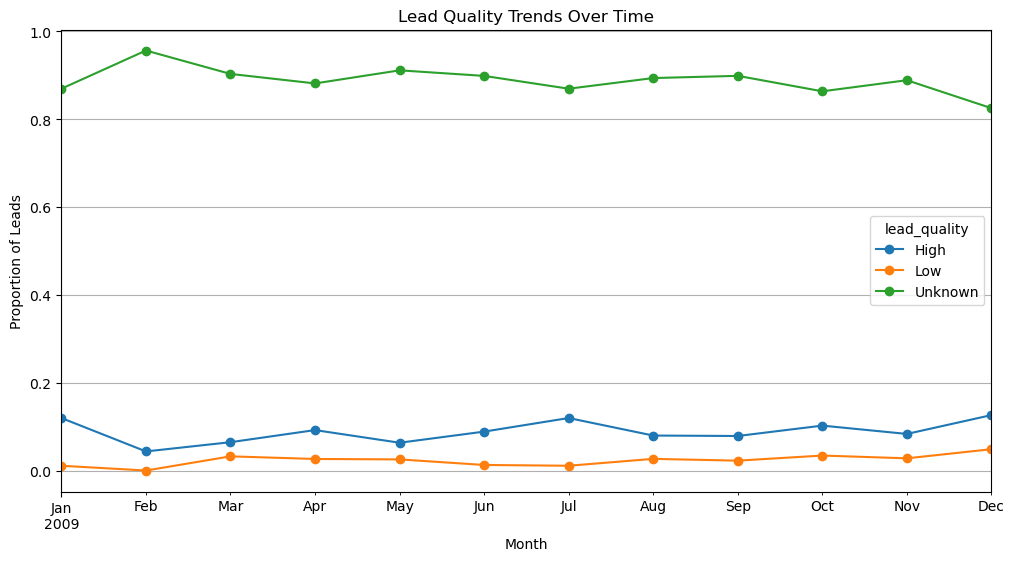

In [959]:
monthly_quality_percent.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Lead Quality Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Proportion of Leads')
plt.grid(True)
plt.show()

## 'Unknown' lead quality is falling in to a higher proprton, and, as we can see, the lead quality is not improving much over the period of time. It is improving slowly or no clear pattern visibility of improving.

In [961]:
print("Earliest lead date:", df['leadcreated'].min())
print("Latest lead date:", df['leadcreated'].max())

Earliest lead date: 2009-01
Latest lead date: 2009-12


## Q2: What can we learn about the drivers of "lead quality" from this dataset? What segments - ## 
where the ad was shown, what kind of person filledout  the ad, what kind of ad did they see
have differing lead quality rates?

In [963]:
widget_quality = df.groupby('widgetname')['lead_quality'].value_counts(normalize=True).unstack().fillna(0)
widget_quality['high_quality_rate'] = widget_quality['High']
widget_quality = widget_quality.sort_values('high_quality_rate', ascending=False)
widget_quality.head()

lead_quality,High,Low,Unknown,high_quality_rate
widgetname,,,,
w-300250-DebtReduction1-1DC-white,0.166667,0.000000,0.833333,0.166667
w-300250-DebtReduction1-1DC-CreditSolutions,0.155844,0.025974,0.818182,0.155844
w-300250-DebtReduction1-1DC-BlueMeter,0.141304,0.010870,0.847826,0.141304
w-300250-DebtReduction1-1DC-Head2,0.123596,0.044944,0.831461,0.123596
w-300250-DebtReduction1-1DC,0.097701,0.045977,0.856322,0.097701


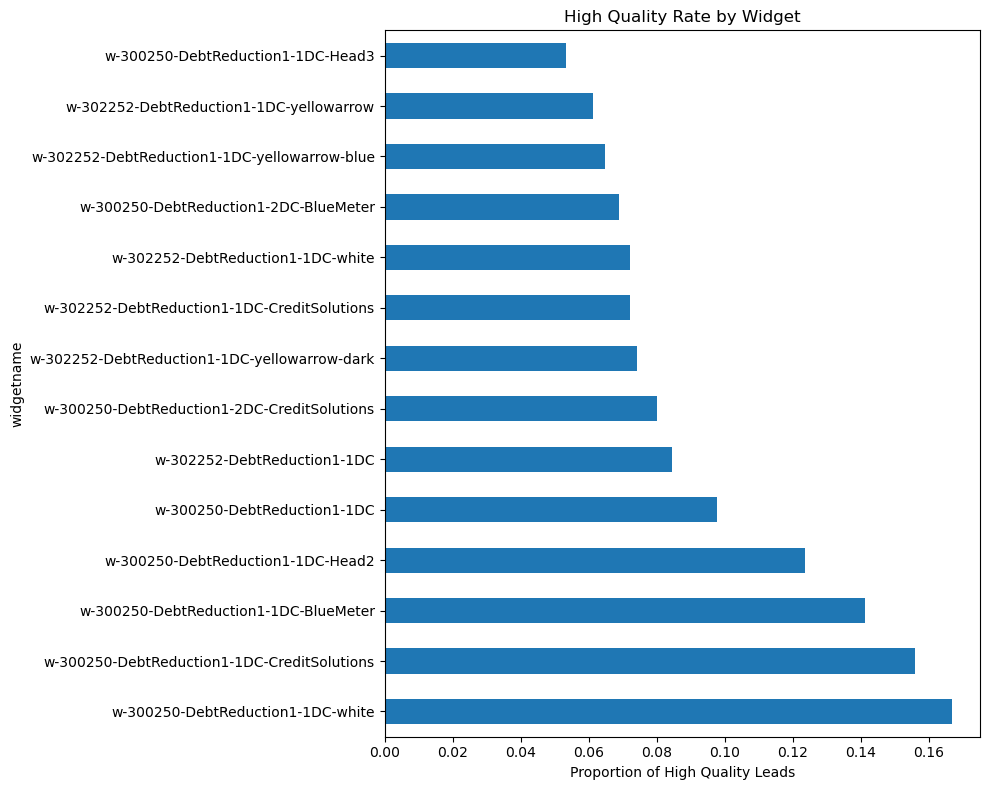

In [964]:
widget_quality['high_quality_rate'].plot(kind='barh', figsize=(10, 8), title='High Quality Rate by Widget')
plt.xlabel('Proportion of High Quality Leads')
plt.tight_layout()
plt.show()


In [978]:
print(df.columns.tolist())

['leadcreated', 'firstname', 'email', 'vendorleadid', 'callstatus', 'widgetname', 'publisherzonename', 'publishercampaignname', 'addressscore', 'phonescore', 'advertisercampaignname', 'state', 'debtlevel', 'ip_address', 'partner', 'referraldomain', 'marketingcampaign', 'adgroup', 'keyword', 'searchquery', 'referralurl', 'referralurl_parameters', 'landingpageurl', 'landing_page_url_parameters', 'quality_category', 'month', 'week', 'lead_quality']


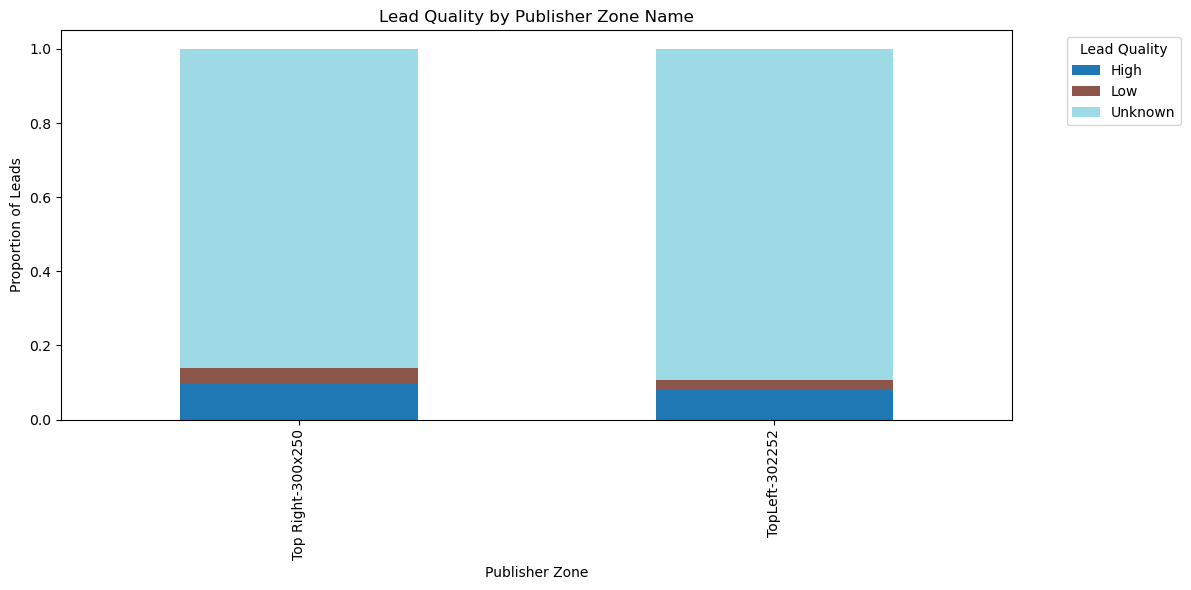

In [981]:
#  segment it by 'PublisherZoneName' and analyze how lead quality varies across zones.

#  1. Group by PublisherZoneName and lead_quality

zone_segment = df.groupby(['publisherzonename', 'lead_quality']).size().unstack(fill_value=0)

# 2. Convert to proportions
zone_segment_percent = zone_segment.div(zone_segment.sum(axis=1), axis=0)

# 3. Plot stacked bar chart to know the proportion of lead by 'publisherzone'
zone_segment_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Lead Quality by Publisher Zone Name')
plt.ylabel('Proportion of Leads')
plt.xlabel('Publisher Zone')
plt.legend(title='Lead Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


publishercampaignname
DebtReductionInc           2750
DebtReductionCallCenter     271
Name: count, dtype: int64


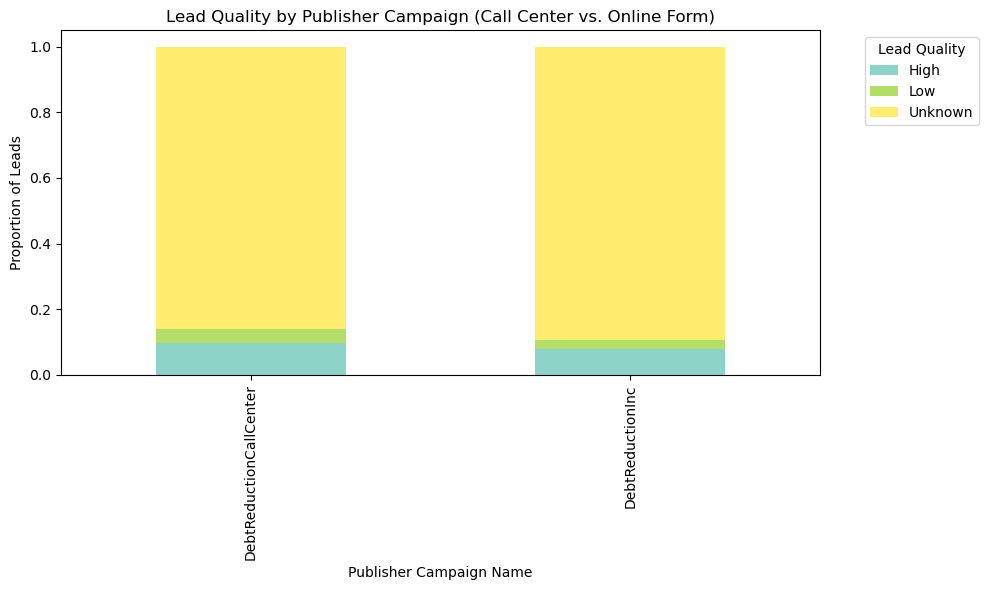

In [982]:
# Let's analyze lead quality by PublisherCampaignName

print(df['publishercampaignname'].value_counts(dropna=False))
campaign_segment = df.groupby(['publishercampaignname', 'lead_quality']).size().unstack(fill_value=0)
campaign_segment_percent = campaign_segment.div(campaign_segment.sum(axis=1), axis=0)
campaign_segment_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Lead Quality by Publisher Campaign (Call Center vs. Online Form)')
plt.ylabel('Proportion of Leads')
plt.xlabel('Publisher Campaign Name')
plt.legend(title='Lead Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [983]:
# Now let’s analyze lead quality by AdvertiserCampaignName, which tells us how branded vs. generic ads perform
print(df['advertisercampaignname'].value_counts(dropna=False))

advertisercampaignname
Debt Settlement1 Master              1815
creditsolutions-branded-shortform    1206
Name: count, dtype: int64


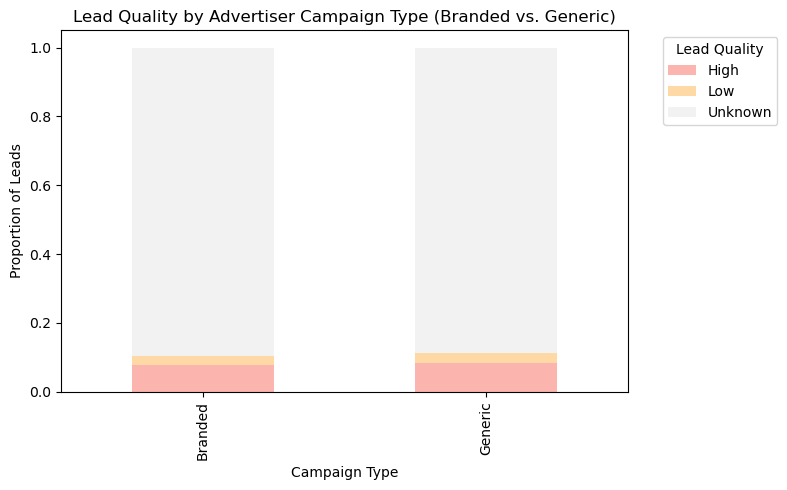

In [984]:
df['campaign_type'] = df['advertisercampaignname'].str.contains('creditsolutions', case=False, na=False)
df['campaign_type'] = df['campaign_type'].map({True: 'Branded', False: 'Generic'})
campaign_type_segment = df.groupby(['campaign_type', 'lead_quality']).size().unstack(fill_value=0)
campaign_type_percent = campaign_type_segment.div(campaign_type_segment.sum(axis=1), axis=0)
campaign_type_percent.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Pastel1')
plt.title('Lead Quality by Advertiser Campaign Type (Branded vs. Generic)')
plt.ylabel('Proportion of Leads')
plt.xlabel('Campaign Type')
plt.legend(title='Lead Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Like above we can do for many other segments listed below
## State
## Debt Level (binned)
## AddressScore / PhoneScore
## Partner
## Referral Domain
## Keyword / AdGroup - this is less importent, it can creat more noise depending on data density. We can use a wordcloud visulization here

In [986]:
print(df.columns.tolist())

['leadcreated', 'firstname', 'email', 'vendorleadid', 'callstatus', 'widgetname', 'publisherzonename', 'publishercampaignname', 'addressscore', 'phonescore', 'advertisercampaignname', 'state', 'debtlevel', 'ip_address', 'partner', 'referraldomain', 'marketingcampaign', 'adgroup', 'keyword', 'searchquery', 'referralurl', 'referralurl_parameters', 'landingpageurl', 'landing_page_url_parameters', 'quality_category', 'month', 'week', 'lead_quality', 'campaign_type']


In [987]:
df['is_closed'] = df['callstatus'].str.strip().str.lower() == 'closed'
df['is_closed']

0       False
1       False
2       False
3       False
4       False
        ...  
3016    False
3017    False
3018    False
3019    False
3020    False
Name: is_closed, Length: 3021, dtype: bool

In [988]:
print(df['widgetname'].isnull().sum())  # Check for NaNs
print(df['widgetname'].dtype) # Confirm it's a string or object



0
object


In [989]:
df['widgetname'] = df['widgetname'].astype(str)

In [990]:
print(df['widgetname'].dtype)

object


In [991]:
# Step 1: Calculate widget-level lead quality
widget_quality_rates = df.groupby('widgetname')['is_closed'].mean().reset_index()
widget_quality_rates.rename(columns={'is_closed': 'widget_quality'}, inplace=True)

# Step 2: Merge back to main df
df = df.merge(widget_quality_rates, on='widgetname', how='left')

In [992]:
df.columns

Index(['leadcreated', 'firstname', 'email', 'vendorleadid', 'callstatus',
       'widgetname', 'publisherzonename', 'publishercampaignname',
       'addressscore', 'phonescore', 'advertisercampaignname', 'state',
       'debtlevel', 'ip_address', 'partner', 'referraldomain',
       'marketingcampaign', 'adgroup', 'keyword', 'searchquery', 'referralurl',
       'referralurl_parameters', 'landingpageurl',
       'landing_page_url_parameters', 'quality_category', 'month', 'week',
       'lead_quality', 'campaign_type', 'is_closed', 'widget_quality'],
      dtype='object')

C:\Users\Dell\AppData\Local\Temp\ipykernel_17752\768782081.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=widget_quality_plot, x='widgetname', y='widget_quality', palette='viridis')


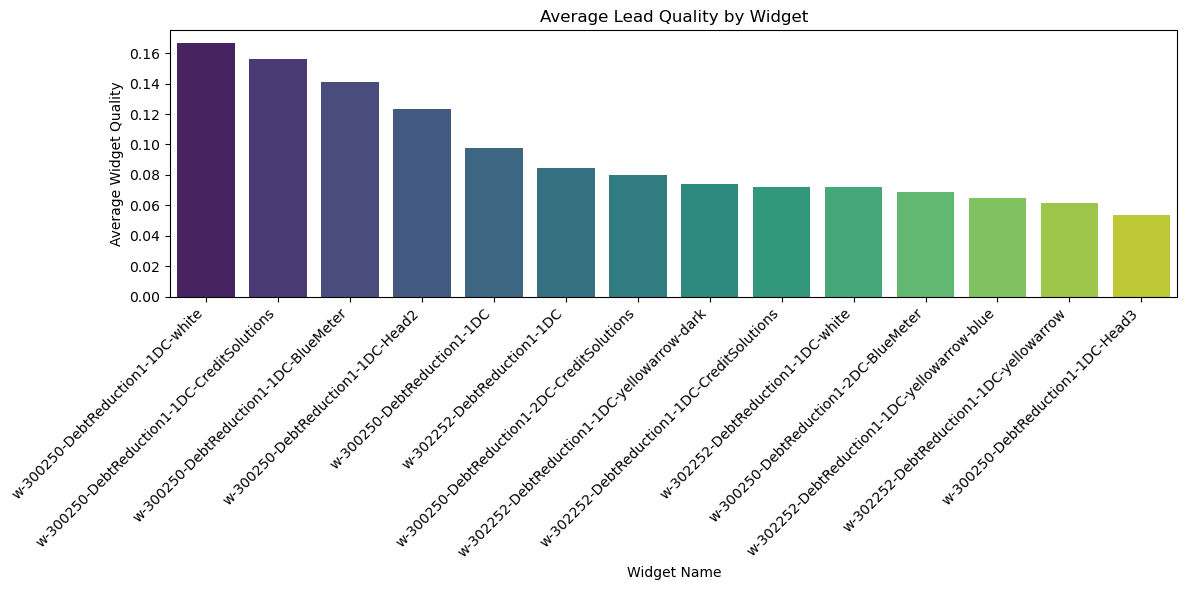

In [993]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by widgetname to get average lead quality
widget_quality_plot = df.groupby('widgetname')['widget_quality'].mean().sort_values(ascending=False).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=widget_quality_plot, x='widgetname', y='widget_quality', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Lead Quality by Widget')
plt.ylabel('Average Widget Quality')
plt.xlabel('Widget Name')
plt.tight_layout()
plt.show()

In [994]:
# Step 1: Compute high quality lead rate per publisher zone
zone_quality_rate = df[df['lead_quality'] == 'High'].groupby('publisherzonename').size() / df.groupby('publisherzonename').size()

# Step 2: Rename and reset index
zone_quality_rate = zone_quality_rate.reset_index().rename(columns={0: 'zone_segment'})

# Step 3: Merge back to the main DataFrame
df = df.merge(zone_quality_rate, on='publisherzonename', how='left')


In [995]:
df.columns

Index(['leadcreated', 'firstname', 'email', 'vendorleadid', 'callstatus',
       'widgetname', 'publisherzonename', 'publishercampaignname',
       'addressscore', 'phonescore', 'advertisercampaignname', 'state',
       'debtlevel', 'ip_address', 'partner', 'referraldomain',
       'marketingcampaign', 'adgroup', 'keyword', 'searchquery', 'referralurl',
       'referralurl_parameters', 'landingpageurl',
       'landing_page_url_parameters', 'quality_category', 'month', 'week',
       'lead_quality', 'campaign_type', 'is_closed', 'widget_quality',
       'zone_segment'],
      dtype='object')

In [998]:
# Step 1: Compute high quality lead rate per campaign
campaign_quality_rate = (
    df[df['lead_quality'] == 'High']
    .groupby('publishercampaignname')
    .size() / df.groupby('publishercampaignname').size()
)

# Step 2: Clean and reset index
campaign_quality_rate = campaign_quality_rate.reset_index().rename(columns={0: 'campaign_segment'})

# Step 3: Merge back into main df
df = df.merge(campaign_quality_rate, on='publishercampaignname', how='left')


In [999]:
df.columns

Index(['leadcreated', 'firstname', 'email', 'vendorleadid', 'callstatus',
       'widgetname', 'publisherzonename', 'publishercampaignname',
       'addressscore', 'phonescore', 'advertisercampaignname', 'state',
       'debtlevel', 'ip_address', 'partner', 'referraldomain',
       'marketingcampaign', 'adgroup', 'keyword', 'searchquery', 'referralurl',
       'referralurl_parameters', 'landingpageurl',
       'landing_page_url_parameters', 'quality_category', 'month', 'week',
       'lead_quality', 'campaign_type', 'is_closed', 'widget_quality',
       'zone_segment', 'campaign_segment'],
      dtype='object')

In [1000]:
# Step 1: Calculate high quality rate per campaign type
campaign_type_quality_rate = (
    df[df['lead_quality'] == 'High']
    .groupby('campaign_type')
    .size() / df.groupby('campaign_type').size()
)

# Step 2: Clean and reset index
campaign_type_quality_rate = campaign_type_quality_rate.reset_index().rename(columns={0: 'campaign_type_segment'})

# Step 3: Merge back to main df
df = df.merge(campaign_type_quality_rate, on='campaign_type', how='left')


In [1001]:
df.columns

Index(['leadcreated', 'firstname', 'email', 'vendorleadid', 'callstatus',
       'widgetname', 'publisherzonename', 'publishercampaignname',
       'addressscore', 'phonescore', 'advertisercampaignname', 'state',
       'debtlevel', 'ip_address', 'partner', 'referraldomain',
       'marketingcampaign', 'adgroup', 'keyword', 'searchquery', 'referralurl',
       'referralurl_parameters', 'landingpageurl',
       'landing_page_url_parameters', 'quality_category', 'month', 'week',
       'lead_quality', 'campaign_type', 'is_closed', 'widget_quality',
       'zone_segment', 'campaign_segment', 'campaign_type_segment'],
      dtype='object')

In [1002]:
# Mapping categorical lead_quality to numeric values
lead_quality_mapping = {
    'high': 1,
    'medium': 0.75,
    'low': 0.5,
    'unknown': 0
}

# Apply the mapping
df['lead_quality_numeric'] = df['lead_quality'].map(lead_quality_mapping)

# Now, you can calculate the mean for each segment
segment_quality = df.groupby(['widget_quality', 'zone_segment', 'campaign_segment', 'campaign_type_segment'])['lead_quality_numeric'].mean().reset_index()

# Display the results sorted by lead quality
segment_quality.sort_values('lead_quality_numeric', ascending=False)


,widget_quality,zone_segment,campaign_segment,campaign_type_segment,lead_quality_numeric
0,0.053333,0.079636,0.079636,0.083196,NaN
1,0.053333,0.095941,0.095941,0.083196,NaN
2,0.061224,0.079636,0.079636,0.083196,NaN
3,0.064655,0.079636,0.079636,0.083196,NaN
4,0.068966,0.079636,0.079636,0.083196,NaN
5,0.068966,0.095941,0.095941,0.083196,NaN
6,0.072093,0.079636,0.079636,0.083196,NaN
7,0.072106,0.079636,0.079636,0.077944,NaN
8,0.074074,0.079636,0.079636,0.083196,NaN
9,0.080000,0.079636,0.079636,0.077944,NaN


In [1003]:
df['lead_quality_numeric'].nunique()

0

In [1004]:
# Check unique values in 'lead_quality' column
print(df['lead_quality'].unique())

['Unknown' 'High' 'Low']


In [1005]:
# Define the mapping with correct capitalization
lead_quality_mapping = {
    'High': 1.0,
    'Medium': 0.75,
    'Low': 0.25,
    'Unknown': 0.0  # or 0.0 if you want to assign a value to 'Unknown'
}

# Apply the mapping
df['lead_quality_numeric'] = df['lead_quality'].map(lead_quality_mapping)

# Check if the 'lead_quality_numeric' column is populated correctly
print(df[['lead_quality', 'lead_quality_numeric']].head())

  lead_quality  lead_quality_numeric
0      Unknown                   0.0
1      Unknown                   0.0
2      Unknown                   0.0
3      Unknown                   0.0
4      Unknown                   0.0


In [1006]:
print(df['lead_quality_numeric'].unique())

[0.   1.   0.25]


In [1007]:
# Now, you can calculate the mean for each segment
segment_quality = df.groupby(['widget_quality', 'zone_segment', 'campaign_segment', 'campaign_type_segment'])['lead_quality_numeric'].mean().reset_index()

# Display the results sorted by lead quality
segment_quality.sort_values('lead_quality_numeric', ascending=False)

,widget_quality,zone_segment,campaign_segment,campaign_type_segment,lead_quality_numeric
18,0.166667,0.079636,0.079636,0.083196,0.166667
16,0.141304,0.095941,0.095941,0.083196,0.166667
17,0.155844,0.079636,0.079636,0.077944,0.162338
15,0.141304,0.079636,0.079636,0.083196,0.142442
13,0.123596,0.079636,0.079636,0.083196,0.141176
11,0.097701,0.079636,0.079636,0.083196,0.109890
12,0.097701,0.095941,0.095941,0.083196,0.108949
10,0.084559,0.079636,0.079636,0.083196,0.090074
9,0.080000,0.079636,0.079636,0.077944,0.086667
7,0.072106,0.079636,0.079636,0.077944,0.078748


In [1008]:
# Reverse mapping from numeric to original labels
numeric_to_quality = {
    1.0: 'High',
    0.66: 'Medium',
    0.33: 'Low',
    0.0: 'Unknown'
}

# Round to two decimal places (to match keys exactly)
df['lead_quality_label'] = df['lead_quality_numeric'].round(2).map(numeric_to_quality)


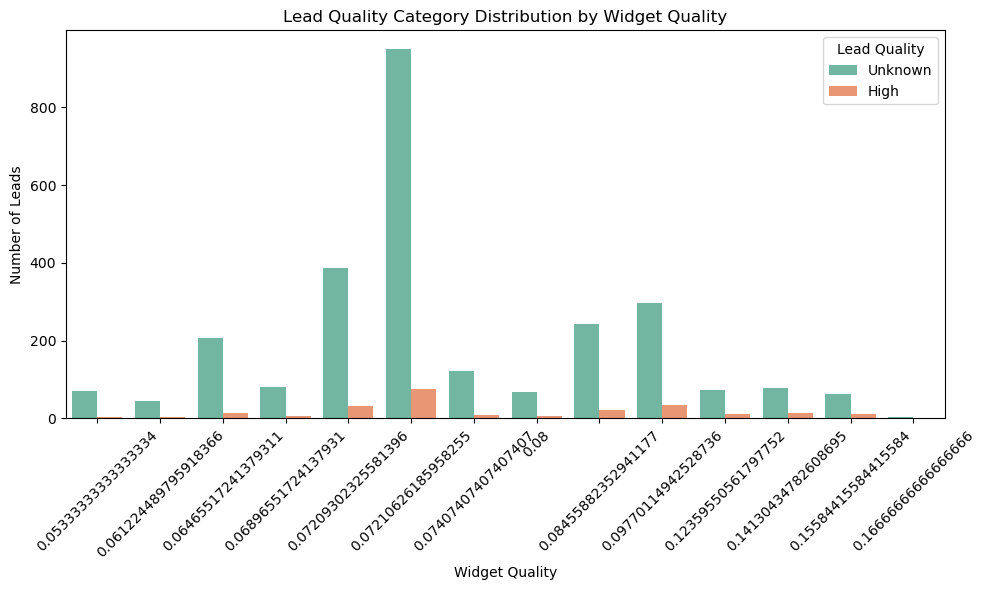

In [1009]:
# Count plot of lead quality labels by widget_quality
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='widget_quality', hue='lead_quality_label', palette='Set2')

plt.title('Lead Quality Category Distribution by Widget Quality')
plt.xlabel('Widget Quality')
plt.ylabel('Number of Leads')
plt.legend(title='Lead Quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


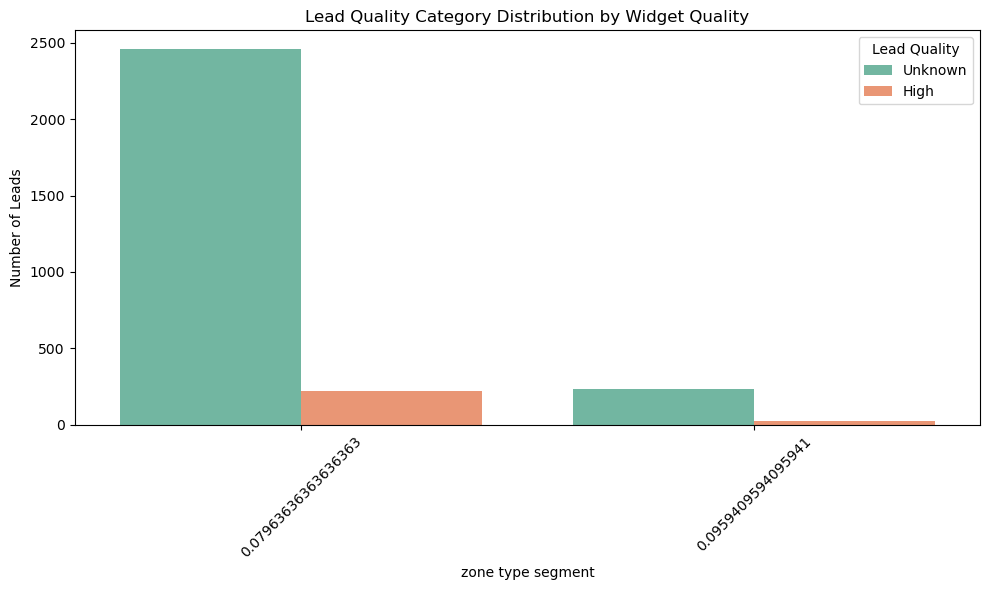

In [1010]:
# Count plot of lead quality labels by widget_quality
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='zone_segment', hue='lead_quality_label', palette='Set2')

plt.title('Lead Quality Category Distribution by Widget Quality')
plt.xlabel('zone type segment')
plt.ylabel('Number of Leads')
plt.legend(title='Lead Quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


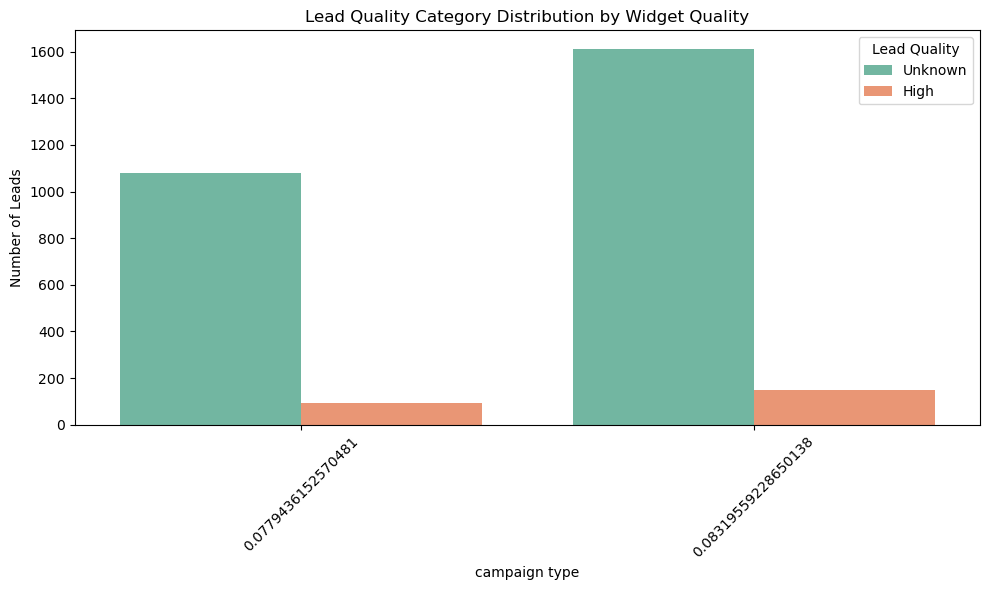

In [1011]:
# Count plot of lead quality labels by widget_quality
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='campaign_type_segment', hue='lead_quality_label', palette='Set2')

plt.title('Lead Quality Category Distribution by Widget Quality')
plt.xlabel('campaign type')
plt.ylabel('Number of Leads')
plt.legend(title='Lead Quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
